In [8]:
"""
Exercise 6 (advanced): Simulated Annealing

Let's use simulated annealing to solve a simple two-dimensional optimization problem. The following code runs 50 optimization tracks in parallel (at the same time). It currently only looks around the current solution and only accepts moves that go up. Modify the program so that it uses simulated annealing.

Remember that the probability of accepting a solution that lowers the score is given by prob = exp(–(S_old - S_new)/T). Remember to also adjust the temperature in a way that it decreases as the simulation goes on, and to handle T=0 case correctly.

Your goal is to ensure that on the average, at least 30 of the optimization tracks find the global optimum (the highest peak).
"""
import numpy as np
import random
import math

N = 100     # size of the problem is N x N
steps = 3000    # total number of iterations
tracks = 50

# generate a landscape with multiple local optima
def generator(x, y, x0=0.0, y0=0.0):
    return np.sin((x/N-x0)*np.pi)+np.sin((y/N-y0)*np.pi)+\
        .07*np.cos(12*(x/N-x0)*np.pi)+.07*np.cos(12*(y/N-y0)*np.pi)

x0 = np.random.random() - 0.5
y0 = np.random.random() - 0.5
h = np.fromfunction(np.vectorize(generator), (N, N), x0=x0, y0=y0, dtype=int)
peak_x, peak_y = np.unravel_index(np.argmax(h), h.shape)

# starting points
x = np.random.randint(0, N, tracks)
y = np.random.randint(0, N, tracks)

def main():
    global x
    global y

    for step in range(steps):
        # add a temperature schedule here
        T = 2*max(0, ((steps-step*1.2)/steps))**3
        # update solutions on each search track
        for i in range(tracks):
            # try a new solution near the current one
            x_new = np.random.randint(max(0, x[i]-2), min(N, x[i]+2+1))
            y_new = np.random.randint(max(0, y[i]-2), min(N, y[i]+2+1))
            S_old = h[x[i], y[i]]
            S_new = h[x_new, y_new]

            # change this to use simulated annealing
            if S_new > S_old:
                x[i], y[i] = x_new, y_new   # new solution is better, go there
            elif T != 0:
                    probability = math.exp(-(S_old - S_new) / T)
                    if random.random() < probability:
                       x[i], y[i] = x_new, y_new

    # Number of tracks found the peak
    print(sum([x[j] == peak_x and y[j] == peak_y for j in range(tracks)]))
main()

39


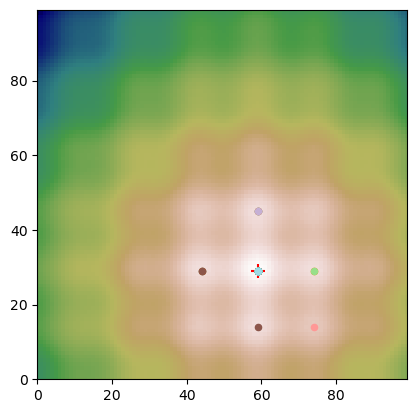

In [9]:
"""Plot, code from https://gist.github.com/AayushKucheria/00912c1fe1d60ae01052f0c905c606e2"""
import matplotlib.pyplot as plt
from matplotlib import cm

plt.xlim(0, N-1)
plt.ylim(0, N-1)
plt.imshow(h, cmap=cm.gist_earth)
plt.scatter([peak_y], [peak_x], color='red', marker='+', s=100)

for j in range(tracks):

    c = cm.tab20(j/tracks)    # use different colors for different tracks
    plt.scatter([y[j]], [x[j]], color=c, s=20)

plt.show()